### https://github.com/krishnaik06/Gaussian-Trnasformaion/blob/master/Untitled3.ipynb

### https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/

## Select the Right Threshold values using ROC(Receiver Operating Characteristic) Curve

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# roc curve and auc score
from sklearn.datasets import make_classification

In [9]:
X, y = make_classification(n_samples=2000, n_classes=2, weights=[1,1], random_state=1)

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [13]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((1400, 20), (1400,), (600, 20), (600,))

In [14]:
from sklearn.metrics import roc_curve, roc_auc_score

### Random Forests

In [16]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)
ytrain_pred = rf_model.predict_proba(X_train)
print(ytrain_pred) # It has 2 columns. 1st col - Probability of getting label 0, 2nd col - Probability of getting label 1
# We r taking probability of getting label 1
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = rf_model.predict_proba(X_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

[[1.   0.  ]
 [0.97 0.03]
 [0.01 0.99]
 ...
 [0.97 0.03]
 [1.   0.  ]
 [0.3  0.7 ]]
RF train roc-auc: 1.0
RF test roc-auc: 0.984311111111111


### Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression
log_classifier=LogisticRegression()
log_classifier.fit(X_train, y_train)
ytrain_pred = log_classifier.predict_proba(X_train) # Predicting Probability
print(ytrain_pred) # It has 2 columns. 1st col - Probability of getting label 0, 2nd col - Probability of getting label 1
# We r taking probability of getting label 1
print('Logistic train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = log_classifier.predict_proba(X_test)
print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

[[9.99688479e-01 3.11520635e-04]
 [9.99966000e-01 3.39995695e-05]
 [2.09976771e-02 9.79002323e-01]
 ...
 [8.58463348e-01 1.41536652e-01]
 [9.99422335e-01 5.77665099e-04]
 [6.07714035e-01 3.92285965e-01]]
Logistic train roc-auc: 0.9863568922694498
Logistic test roc-auc: 0.9885777777777777


### Adaboost Classifier

In [18]:
from sklearn.ensemble import AdaBoostClassifier
adaboost_classifier=AdaBoostClassifier()
adaboost_classifier.fit(X_train, y_train)
ytrain_pred = adaboost_classifier.predict_proba(X_train) # Predicting Probability
print(ytrain_pred) # It has 2 columns. 1st col - Probability of getting label 0, 2nd col - Probability of getting label 1
# We r taking probability of getting label 1
print('AdaBoostClassifier train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = adaboost_classifier.predict_proba(X_test)
print('AdaBoostClassifier test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

[[0.53287087 0.46712913]
 [0.53997612 0.46002388]
 [0.45973131 0.54026869]
 ...
 [0.51608302 0.48391698]
 [0.56747475 0.43252525]
 [0.49714104 0.50285896]]
Logistic train roc-auc: 0.9975081174960356
Logistic test roc-auc: 0.9826111111111111


### KNNClassifier

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
ytrain_pred = knn_classifier.predict_proba(X_train)
print(ytrain_pred) # It has 2 columns. 1st col - Probability of getting label 0, 2nd col - Probability of getting label 1
# We r taking probability of getting label 1
print('KNeighborsClassifier train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = knn_classifier.predict_proba(X_test)
print('KNeighborsClassifier test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

[[1.  0. ]
 [1.  0. ]
 [0.  1. ]
 ...
 [0.6 0.4]
 [1.  0. ]
 [0.4 0.6]]
KNeighborsClassifier train roc-auc: 0.981670071491109
KNeighborsClassifier test roc-auc: 0.9426111111111111


Now we will focus on selecting the best threshold for maximum accuracy

In [53]:
pred = []
for model in [rf_model,log_classifier,adaboost_classifier,knn_classifier]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
#print(pred)
final_prediction = pd.concat(pred,axis='columns').mean(axis='columns')
print(final_prediction)
#print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

0      0.882762
1      0.118323
2      0.821283
3      0.755353
4      0.552447
         ...   
595    0.121340
596    0.112845
597    0.879197
598    0.163217
599    0.834857
Length: 600, dtype: float64


In [35]:
print(type(pd.concat(pred,axis=1)))
print(pd.concat(pred,axis=1))
print(pd.concat(pred,axis=1).mean(axis=1))

<class 'pandas.core.frame.DataFrame'>
        0         1         2    3
0    0.98  0.991861  0.559186  1.0
1    0.01  0.000008  0.463282  0.0
2    0.98  0.966929  0.538202  0.8
3    0.95  0.761539  0.509875  0.8
4    0.54  0.779443  0.490344  0.4
..    ...       ...       ...  ...
595  0.00  0.024239  0.461121  0.0
596  0.01  0.000003  0.441377  0.0
597  1.00  0.984385  0.532403  1.0
598  0.01  0.001147  0.441720  0.2
599  0.99  0.989540  0.559890  0.8

[600 rows x 4 columns]
0      0.882762
1      0.118323
2      0.821283
3      0.755353
4      0.552447
         ...   
595    0.121340
596    0.112845
597    0.879197
598    0.163217
599    0.834857
Length: 600, dtype: float64


#### Calculate ROC Curve

In [52]:
fpr,tpr,thresholds = roc_curve(y_test,final_prediction) # fpr-False Positive Rate,tpr-True Positive Rate
thresholds

array([1.9134413 , 0.9134413 , 0.90406694, 0.90327475, 0.79725303,
       0.7955558 , 0.79452438, 0.79412833, 0.78880736, 0.78821156,
       0.76474465, 0.76287124, 0.74935853, 0.74887362, 0.71044088,
       0.70893711, 0.66037883, 0.65743537, 0.61244697, 0.60675354,
       0.60656376, 0.60486186, 0.5996569 , 0.59364346, 0.5915152 ,
       0.59050386, 0.57646627, 0.57139283, 0.54105932, 0.53469563,
       0.53115858, 0.50616892, 0.45450602, 0.44472765, 0.4421034 ,
       0.40936151, 0.40129719, 0.35183098, 0.35086612, 0.23823004,
       0.23640421, 0.23349466, 0.22896893, 0.20352808, 0.20348417,
       0.12051207, 0.1203351 , 0.10548439])

In [56]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test,y_pred,normalize=True))
accuracy_df = pd.concat([pd.Series(thresholds),pd.Series(accuracy_ls)], axis=1)
accuracy_df.columns = ['thresholds', 'accuracy']
accuracy_df.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_df.head()

,thresholds,accuracy
33,0.444728,0.961667
29,0.534696,0.960000
34,0.442103,0.960000
32,0.454506,0.960000
31,0.506169,0.958333


In [57]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

#### An excellent model has AUC near to the 1 which means it has a good measure of separability. A poor model has AUC near to the 0 which means it has the worst measure of separability.

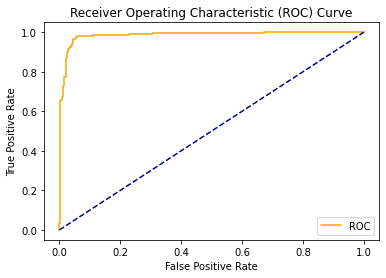

In [58]:
plot_roc_curve(fpr,tpr)